In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub

import warnings

In [6]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [7]:
data_dir = './images'

In [8]:
train_data = datagen.flow_from_directory(data_dir, target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'training')

val_data = datagen.flow_from_directory(data_dir, target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'validation')

Found 128255 images belonging to 145 classes.
Found 32031 images belonging to 145 classes.


In [9]:
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [10]:
model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (250,250,3), name = 'Resnet_V2_50'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(145, activation = 'softmax', name = 'Output_layer')
])

model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

2023-07-16 00:45:02.212755: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [12]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 50, verbose = 1)

4008/4008 [==============================] - 406s 101ms/step - loss: 1.5088 - accuracy: 0.6060
Epoch 2/50
4008/4008 [==============================] - 381s 95ms/step - loss: 1.1431 - accuracy: 0.6926
Epoch 3/50
4008/4008 [==============================] - 388s 97ms/step - loss: 1.0436 - accuracy: 0.7172
Epoch 4/50
4008/4008 [==============================] - 396s 99ms/step - loss: 0.9786 - accuracy: 0.7332
Epoch 5/50
4008/4008 [==============================] - 382s 95ms/step - loss: 0.9342 - accuracy: 0.7427
Epoch 6/50
4008/4008 [==============================] - 398s 99ms/step - loss: 0.8957 - accuracy: 0.7526
Epoch 7/50
4008/4008 [==============================] - 395s 98ms/step - loss: 0.8685 - accuracy: 0.7596
Epoch 8/50
4008/4008 [==============================] - 395s 98ms/step - loss: 0.8434 - accuracy: 0.7659
Epoch 9/50
4008/4008 [==============================] - 397s 99ms/step - loss: 0.8216 - accuracy: 0.7709
Epoch 10/50
4008/4008 [==============================] - 397s 99m

In [13]:
model_Efficientnet.evaluate(val_data)

1001/1001 [==============================] - 119s 118ms/step - loss: 1.7486 - accuracy: 0.6876


[1.7486478090286255, 0.6875839233398438]

In [14]:
def plot_graph(history):
    loss_ef = history.history['loss']
    
    Accuracy_ef = history.history['accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss_ef, label = 'Efficientnet Loss')
    plt.title('Epochs Vs Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, Accuracy_ef, label = 'Efficientnet Accuracy')
    plt.title('Epochs Vs Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()

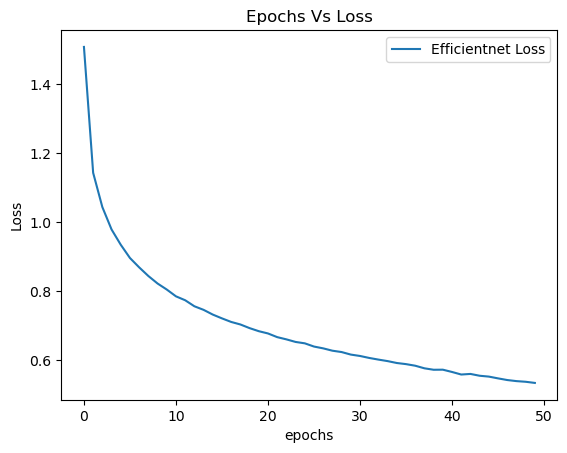

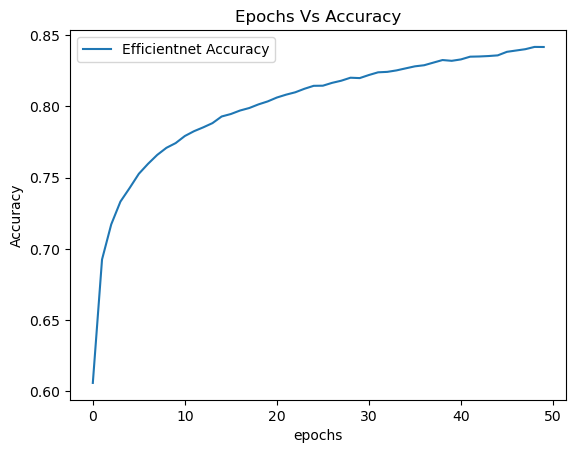

In [15]:
plot_graph(efficientnet_model)

In [16]:
model_name = 'efficientnet_145class.h5'
model_Efficientnet.save(model_name, save_format='h5')